# Lab 6

### <span style="color:chocolate"> Submission requirements </span>

Your homework will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own
* Try and minimize the use of the global namespace (meaning, keep things inside functions)
* Upload your .ipynb file to Gradescope when done
---

This lab connects all the pieces involved in training feed-forward fully connected neural networks. You will run a full set of experiments to explore different hyperparameters and hidden layer sizes for both the MNIST and FASHION_MNIST datasets, and report your findings.

In [1]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

2024-02-13 20:28:03.783639: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Datasets


### Fashion MNIST

We load the fashion_mnist dataset as before.

Label: t-shirt


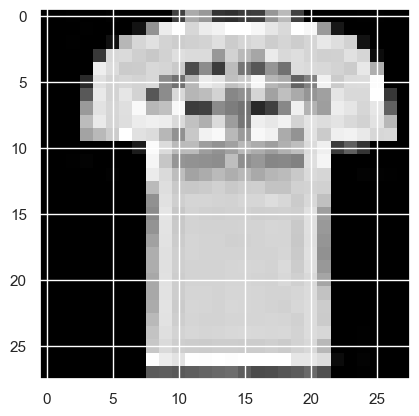

In [2]:
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset.
(X_train_fashion, Y_train_fashion), (X_test_fashion, Y_test_fashion) = fashion_mnist.load_data()
X_train_fashion = X_train_fashion / 255.
X_test_fashion = X_test_fashion / 255.

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_fashion = Y_train_fashion.flatten()
Y_test_fashion = Y_test_fashion.flatten()

label_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_fashion.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_fashion = X_train_fashion[shuffled_indices]
Y_train_fashion = Y_train_fashion[shuffled_indices]

# Show the first training example.
print('Label: %s' %label_names[Y_train_fashion[0]])
plt.imshow(X_train_fashion[0], cmap='gray')
plt.show()

### MNIST

We also load the (digits) mnist dataset in the same way. Note that the number of train/test examples as well as the data shapes are identical to fashion_mnist.

11490434/11490434 [==============================] - 1s 0us/step
Label: 3


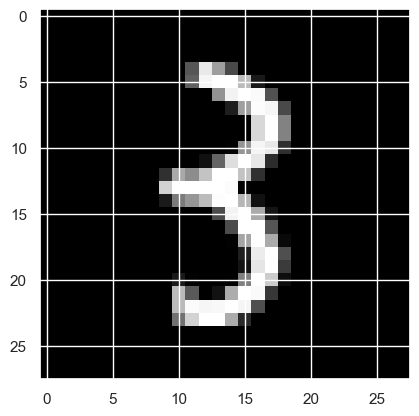

In [3]:
from keras.datasets import mnist

# Load the MNIST dataset.
(X_train_digits, Y_train_digits), (X_test_digits, Y_test_digits) = mnist.load_data()
X_train_digits = X_train_digits / 255
X_test_digits = X_test_digits / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_digits = Y_train_digits.flatten()
Y_test_digits = Y_test_digits.flatten()

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_digits.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_digits = X_train_digits[shuffled_indices]
Y_train_digits = Y_train_digits[shuffled_indices]

# Show the first training example.
print('Label: %d' %Y_train_digits[0])
plt.imshow(X_train_digits[0], cmap='gray')
plt.show()

## Build a Model

We will write a build_model function that allows for a range of experiments on both datasets.

---
### Exercise 1 (50 points)

Fill in code that implements the build_model function, including all the arguments listed in the function definition [Note: the activation function parameter is only for the the hidden layers, use the appropriate final classification function for the final layer as usual].

In [42]:
def build_model(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  # YOUR CODE HERE
  model = keras.models.Sequential()

  # add the input layer and flatten the original shape
  model.add(keras.layers.Flatten())

  # add hidden layers based on the number of hidden layers input in the function
  # if there are no hidden layers, skip this step
  if len(hidden_layer_sizes) == [0]:
    pass
  
  # if there are hidden layers, add it to the model
  else:
    for layer in hidden_layer_sizes:

      # activate the layer based on the input activation function
      model.add(keras.layers.Dense(layer, activation=activation))
  
  # add the output layer with the softmax activation function
  model.add(keras.layers.Dense(n_classes, activation='softmax'))
  
  # set the optimizer based on the input optimizer and the learning rate
  if optimizer == 'SGD':
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  elif optimizer == 'Adam':
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  
  # compile all of the layers of the model that we just built using 
  # the multi-class loss calculation, the optimizer we created above
  # and the accuracy metric to evaluate each epoch
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

---

## Run Experiments

We can now run a suite of experiments to see how the hyperparameters and layer sizes effect performance. The train_and_evaluate function below can be used to run experiments and retrieve results.

Training...


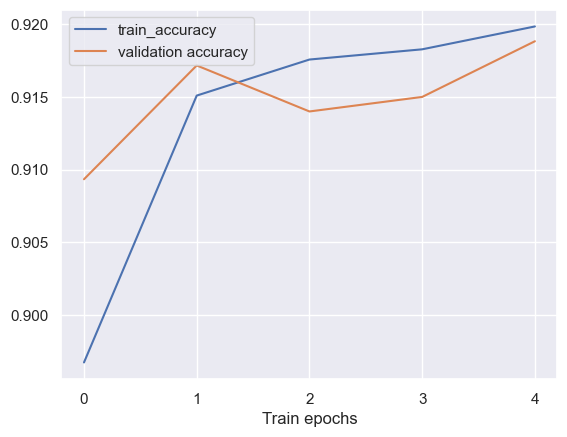

Number of Parameters: 7850
Test Accuracy: 0.9214


In [47]:
def train_and_evaluate(data='digits',
                       hidden_layer_sizes=[],
                       activation='tanh',
                       optimizer='Adam',
                       learning_rate=0.01,
                       num_epochs=5):

  # Build the model.
  model = build_model(n_classes=10,
                      hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      learning_rate=learning_rate)

  # Select the dataset.
  if data == 'digits':
    X_train = X_train_digits
    X_test = X_test_digits
    Y_train = Y_train_digits
    Y_test = Y_test_digits
  elif data == 'fashion':
    X_train = X_train_fashion
    X_test = X_test_fashion
    Y_train = Y_train_fashion
    Y_test = Y_test_fashion
  else:
    raise 'Unsupported dataset: %s' %data

  # Train the model.
  print('Training...')
  history = model.fit(
    x=X_train,
    y=Y_train,
    epochs=num_epochs,
    batch_size=64,
    validation_split=0.1,
    verbose=0)

  # Retrieve the training metrics (after each train epoch) and the final test
  # accuracy.
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  plt.plot(train_accuracy, label='train_accuracy')
  plt.plot(val_accuracy, label='validation accuracy')
  plt.xticks(range(num_epochs))
  plt.xlabel('Train epochs')
  plt.legend()
  plt.show()

  print('Number of Parameters:', model.count_params())

  test_accuracy = model.evaluate(x=X_test, y=Y_test, verbose=0,
                                 return_dict=True)['accuracy']
  return test_accuracy

print('Test Accuracy: %1.4f' %train_and_evaluate())

---
### Exercise 2 (50 points)

Run experiments and fill in the test results in the table below. Feel free to extend the table to more experiments as you see fit.

Training...


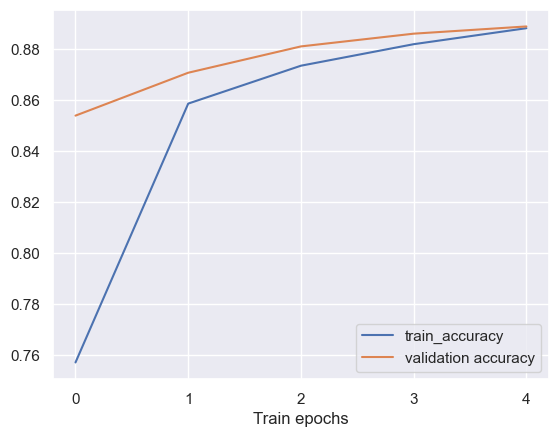

Number of Parameters: 7850
Test Accuracy for a Model with digits data, [] hidden layers, using tanh activation function, SGD optimizer and a learning rate of 0.01 over 5 epochs is: 0.8980000019073486
Training...


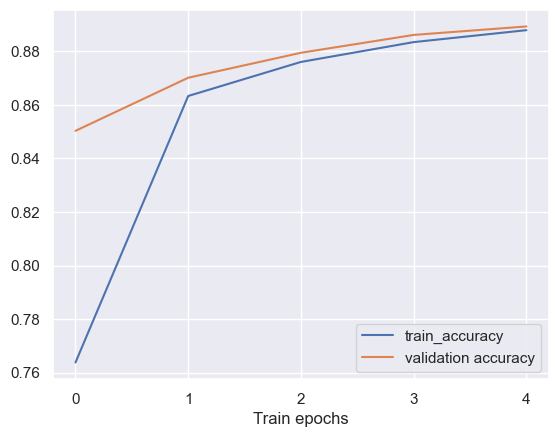

Number of Parameters: 7850
Test Accuracy for a Model with digits data, [] hidden layers, using relu activation function, SGD optimizer and a learning rate of 0.01 over 5 epochs is: 0.8973000049591064
Training...


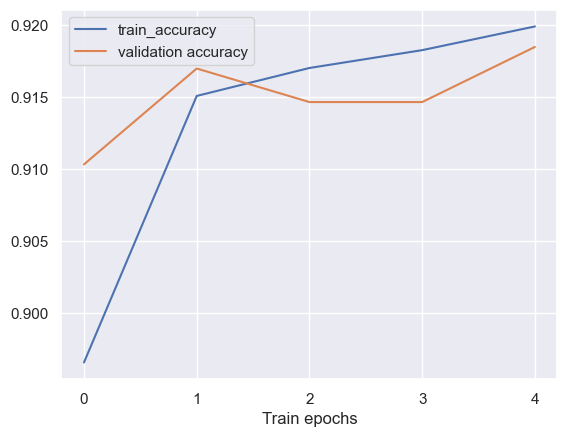

Number of Parameters: 7850
Test Accuracy for a Model with digits data, [] hidden layers, using relu activation function, Adam optimizer and a learning rate of 0.01 over 5 epochs is: 0.9211000204086304
Training...


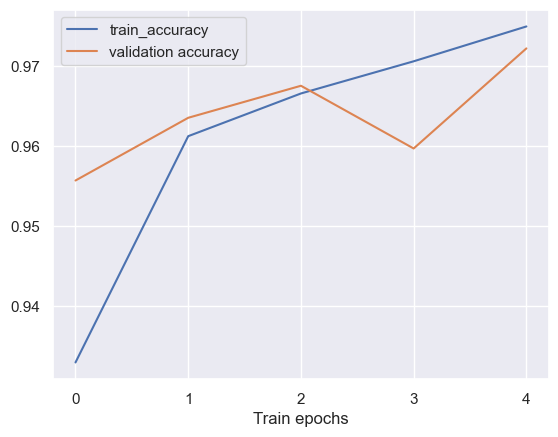

Number of Parameters: 101770
Test Accuracy for a Model with digits data, [128] hidden layers, using relu activation function, Adam optimizer and a learning rate of 0.01 over 5 epochs is: 0.9692999720573425
Training...


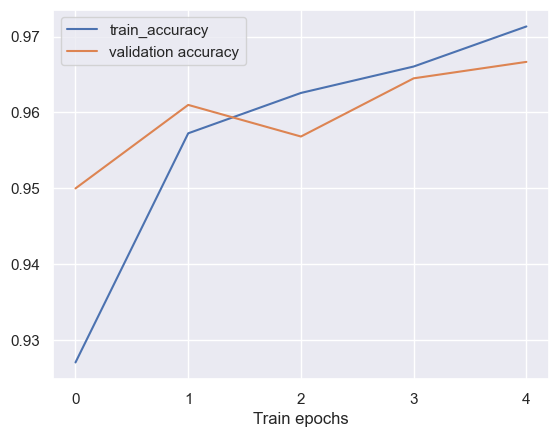

Number of Parameters: 235146
Test Accuracy for a Model with digits data, [256, 128] hidden layers, using relu activation function, Adam optimizer and a learning rate of 0.01 over 5 epochs is: 0.9699000120162964
Training...


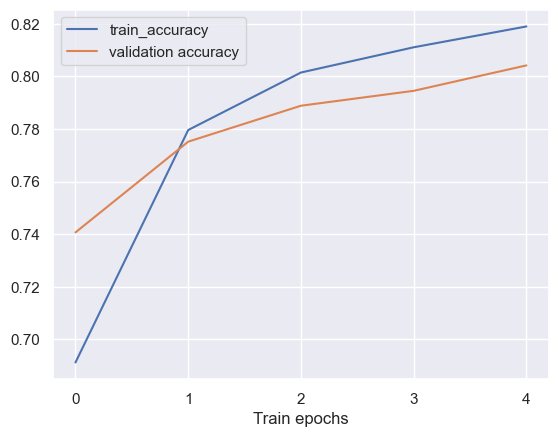

Number of Parameters: 7850
Test Accuracy for a Model with fashion data, [] hidden layers, using tanh activation function, SGD optimizer and a learning rate of 0.01 over 5 epochs is: 0.8086000084877014
Training...


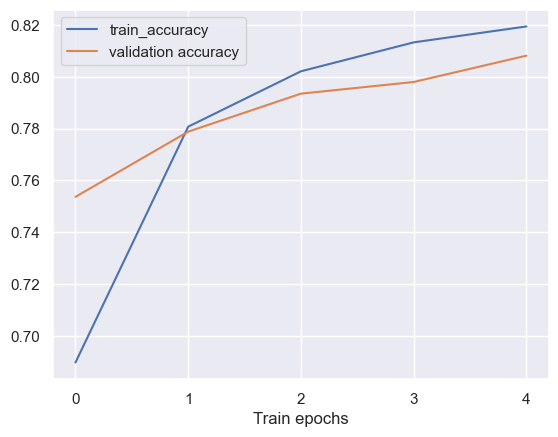

Number of Parameters: 7850
Test Accuracy for a Model with fashion data, [] hidden layers, using relu activation function, SGD optimizer and a learning rate of 0.01 over 5 epochs is: 0.8087999820709229
Training...


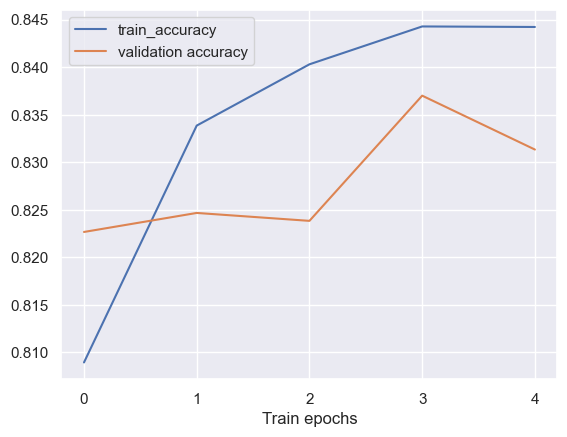

Number of Parameters: 7850
Test Accuracy for a Model with fashion data, [] hidden layers, using relu activation function, Adam optimizer and a learning rate of 0.01 over 5 epochs is: 0.8356999754905701
Training...


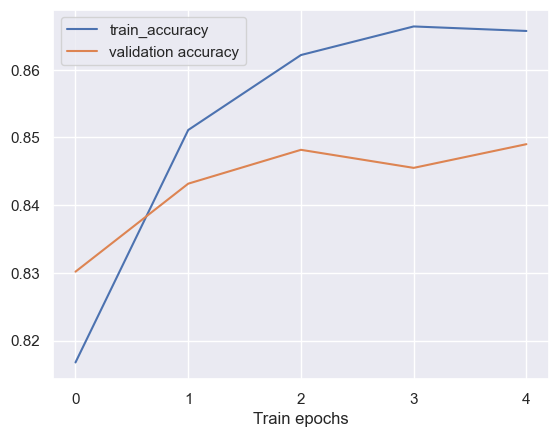

Number of Parameters: 101770
Test Accuracy for a Model with fashion data, [128] hidden layers, using relu activation function, Adam optimizer and a learning rate of 0.01 over 5 epochs is: 0.8485000133514404
Training...


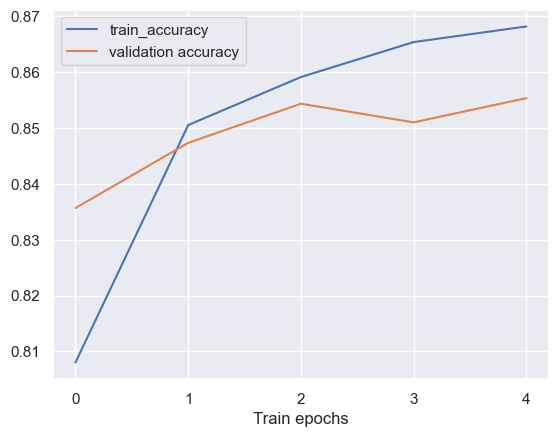

Number of Parameters: 235146
Test Accuracy for a Model with fashion data, [256, 128] hidden layers, using relu activation function, Adam optimizer and a learning rate of 0.01 over 5 epochs is: 0.8471999764442444


In [48]:
# Create a list of lists for data, hidden layer sizes, activation function, optimizer, learning rate, and number of epochs 
experiments = [['digits', [], 'tanh', 'SGD', 0.01, []], 
               ['digits', [], 'relu', 'SGD', 0.01, []], 
               ['digits', [], 'relu', 'Adam', 0.01, []],
               ['digits', [128], 'relu', 'Adam', 0.01, []],
               ['digits', [256, 128], 'relu', 'Adam', 0.01, []],
               ['fashion', [], 'tanh', 'SGD', 0.01, []],
               ['fashion', [], 'relu', 'SGD', 0.01, []],
               ['fashion', [], 'relu', 'Adam', 0.01, []],
               ['fashion', [128], 'relu', 'Adam', 0.01, []],
               ['fashion', [256, 128], 'relu', 'Adam', 0.01, []]]


# Loop through the experiments and append the test accuracy to the last element of each list
for i in range(len(experiments)):
  experiments[i].append(train_and_evaluate(data=experiments[i][0],
                                          hidden_layer_sizes=experiments[i][1],
                                          activation=experiments[i][2],
                                          optimizer=experiments[i][3],
                                          learning_rate=experiments[i][4],
                                          num_epochs=5))
  print('Test Accuracy for a Model with', experiments[i][0], 'data,', experiments[i][1], 'hidden layers, using', experiments[i][2], 'activation function,', experiments[i][3], 'optimizer', 
        'and a learning rate of', experiments[i][4], 'over 5 epochs is:', experiments[i][-1])

#### Student Solution

DATA | HIDDEN SIZES | ACTIVATION | OPTIMIZER | LEARNING RATE | #PARAMETERS | TEST ACCURACY
-|-|-|-|-|-|-
digits|[]|tanh|SGD|0.01|7850|0.8974000215530396
digits|[]|relu|SGD|0.01|7850|0.8974000215530396
digits|[]|relu|Adam|0.01|7850|0.9208999872207642
digits|[128]|relu|Adam|0.01|101770|0.9700999855995178
digits|[256,128]|relu|Adam|0.01|235146|0.9668999910354614
fashion|[]|tanh|SGD|0.01|7850|0.8095999956130981
fashion|[]|relu|SGD|0.01|7850|0.8064000010490417
fashion|[]|relu|Adam|0.01|7850|0.8363999724388123
fashion|[128]|relu|Adam|0.01|101770|0.8544999957084656
fashion|[256,128]|relu|Adam|0.01|235146|0.8425999879837036
